In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import astropy.constants as const

from astropy.timeseries import LombScargle

def amplitude_spectrum(t, y, fmin=None, fmax=None, oversample_factor=10.0):
    
    tmax = t.max()
    tmin = t.min()
    df = 1.0 / (tmax - tmin)

    if fmin is None:
        fmin = df
    if fmax is None:
        fmax = 0.5 / np.median(np.diff(t))  # *nyq_mult

    freq = np.arange(fmin, fmax, df / oversample_factor)
    model = LombScargle(t, y)
    sc = model.power(freq, method="fast", normalization="psd")

    fct = np.sqrt(4.0 / len(t))
    amp = np.sqrt(sc) * fct

    return freq, amp


In [46]:
df = pd.read_csv('../data/catalogues/rev_AF_stars.csv', dtype={'kic': str})
df = df[df['dSct'] == 1]
# df['pulsating'] == 1

In [47]:

row = df.iloc[100]

In [52]:
plt.style.use('science')

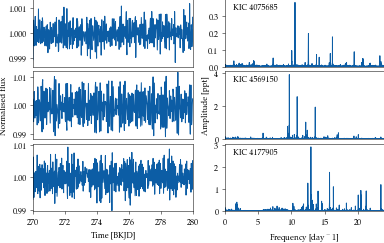

In [109]:
import glob
fig, axes = plt.subplots(3,2, figsize=[6.3, 3.9])
axes = axes.flatten()

ax = axes[0]
row = df.iloc[202]
time, flux, _= np.loadtxt(glob.glob(f'../data/lightcurves/spline corrected PDC/lc/*5202905*')[0]).T
ax.plot(time, flux, rasterized=True)
ax.set(xlim=[270,280], ylim=[1 - 3*np.std(flux), 1 + 3*np.std(flux)], xticks=[])
f,a = amplitude_spectrum(time, flux)
axes[1].plot(f, a*1e3, rasterized=True)
axes[1].set(xlim=[0, 24], ylim=[0, None], xticks=[])
axes[1].annotate(f'KIC {row.kic}', (0.05, 0.85), xycoords='axes fraction', fontsize=8)

ax = axes[2]
row = df.iloc[281]
time, flux, _= np.loadtxt(glob.glob(f'../data/lightcurves/spline corrected PDC/lc/*{row.kic}*')[0]).T
ax.plot(time, flux, rasterized=True)
ax.set(xlim=[270,280], ylim=[1 - 3*np.std(flux), 1 + 3*np.std(flux)], xticks=[], ylabel='Normalised flux')
f,a = amplitude_spectrum(time, flux)
axes[3].plot(f, a*1e3, rasterized=True)
axes[3].set(xlim=[0, 24], ylim=[0, None], xticks=[], ylabel='Amplitude [ppt]')
axes[3].annotate(f'KIC {row.kic}', (0.05, 0.85), xycoords='axes fraction', fontsize=8)

ax = axes[4]
row = df.iloc[222]
time, flux, _= np.loadtxt(glob.glob(f'../data/lightcurves/spline corrected PDC/lc/*{row.kic}*')[0]).T
ax.plot(time, flux, rasterized=True)
ax.set(xlim=[270,280], ylim=[1 - 3*np.std(flux), 1 + 3*np.std(flux)], xlabel='Time [BKJD]')
f,a = amplitude_spectrum(time, flux)
axes[5].plot(f, a*1e3, rasterized=True)
axes[5].set(xlim=[0, 24], ylim=[0, None], xlabel=f'Frequency [day$^{-1}$]')
axes[5].annotate(f'KIC {row.kic}', (0.05, 0.85), xycoords='axes fraction', fontsize=8)

plt.subplots_adjust(hspace=0.07)

plt.savefig('example_dsct.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

In [110]:
mnras_size(453.543)

[6.299208333333333, 3.893124852216577]

In [70]:
def mnras_size(fig_width_pt, square=False):
    inches_per_pt = 1.0 / 72.00  # Convert pt to inches
    golden_mean = (np.sqrt(5) - 1.0) / 2.0  # Most aesthetic ratio
    fig_width = fig_width_pt * inches_per_pt  # Figure width in inches
    if square:
        fig_height = fig_width
    else:
        fig_height = fig_width * golden_mean
    return [fig_width, fig_height]

In [3]:
df = pd.read_csv('cumulative_2021.06.20_23.30.41.csv')
m = df.koi_disposition == 'CONFIRMED'


In [4]:
df['sdensity'] = (3*(df.koi_smass.values*u.M_sun).to(u.kg)) / (4 * np.pi * ((df.koi_srad.values*u.R_sun).to(u.m))**3)
df['implied_density'] = (3*(df.koi_period.values*u.day).to(u.s)) / (np.pi**2 * const.G * (df.koi_duration.values*u.hr).to(u.s)**3)

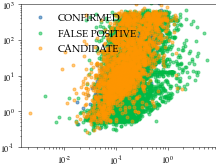

In [29]:
# plt.plot((df.koi_duration.values*u.hr).to(u.day).value[~m], df.koi_period[~m], '.')
for disp in ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']:
    m = df.koi_disposition == disp
    plt.plot((df.koi_duration.values*u.hr).to(u.day).value[m], df.koi_period[m], '.', alpha=0.5, label=disp)
plt.ylim(1e-1, 1000)
# plt.xlim(0, 6)
plt.xscale('log')
plt.legend()
plt.yscale('log')
# plt.xlim(10**2, 10**8)

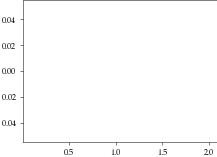

In [51]:
plt.hist(df.koi_incl, bins=50, range=[0.1,2]);

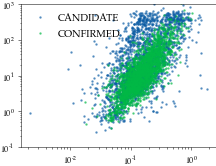

In [52]:
# plt.plot((df.koi_duration.values*u.hr).to(u.day).value[~m], df.koi_period[~m], '.')
for disp in ['CANDIDATE', 'CONFIRMED']:
    m = df.koi_disposition == disp
    plt.plot((df.koi_duration.values*u.hr).to(u.day).value[m], df.koi_period[m], '.', alpha=0.5, label=disp, ms=3)
plt.ylim(1e-1, 1000)
# plt.xlim(0, 6)
plt.xscale('log')
plt.legend()
plt.yscale('log')
# plt.xlim(10**2, 10**8)

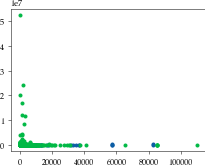

In [53]:
plt.plot(df['sdensity'][m], df['implied_density'][m], '.')
plt.plot(df['sdensity'][~m], df['implied_density'][~m], '.')
# plt.ylim(0,5000)